In [1]:
#Sales prediction and Order Quantity prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
#import lightgbm as lgb
import datetime as dt
#import calendar,warnings,itertools,matplotlib,keras,shutil
#import tensorflow as tf
import statsmodels.api as sm
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge


#Hiding the warnings
from warnings import filterwarnings
filterwarnings('ignore')

import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [3]:
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
#Importing Dataset using pandas
data=pd.read_csv("DataCoSupplyChainDataset.csv")
data.head(5)# Checking 5 rows in dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## Data Preprocessing

In [5]:
data.shape

(180519, 53)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [7]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [8]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

### null value detection

In [9]:
data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


The total data set consists of 180519 records and 53 columns

In [10]:
data.drop(columns=['Customer Id' , 'Category Id', 'Department Id','Customer Zipcode', 'Order Customer Id' ,
                 'Order Item Cardprod Id','Order Item Id', 'Product Card Id' ,'Product Category Id',
                 'Customer Fname','Customer Lname','Customer State','Customer Street',
                 'Department Name','Latitude','Longitude','Product Image','Customer Email', 'Customer Password',
                 'Order Zipcode', 'Product Description', 'Product Status','Customer City',
                 'Customer Country','Order City','Order State','Product Name','shipping date (DateOrders)'], axis = 1, inplace=True)

In [11]:
data.select_dtypes(exclude=np.object).columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Order Id', 'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Product Price'],
      dtype='object')

In [12]:
df_num= data.select_dtypes(exclude='object')
df_cat= data.select_dtypes(include='object')

### Outlier and skewness

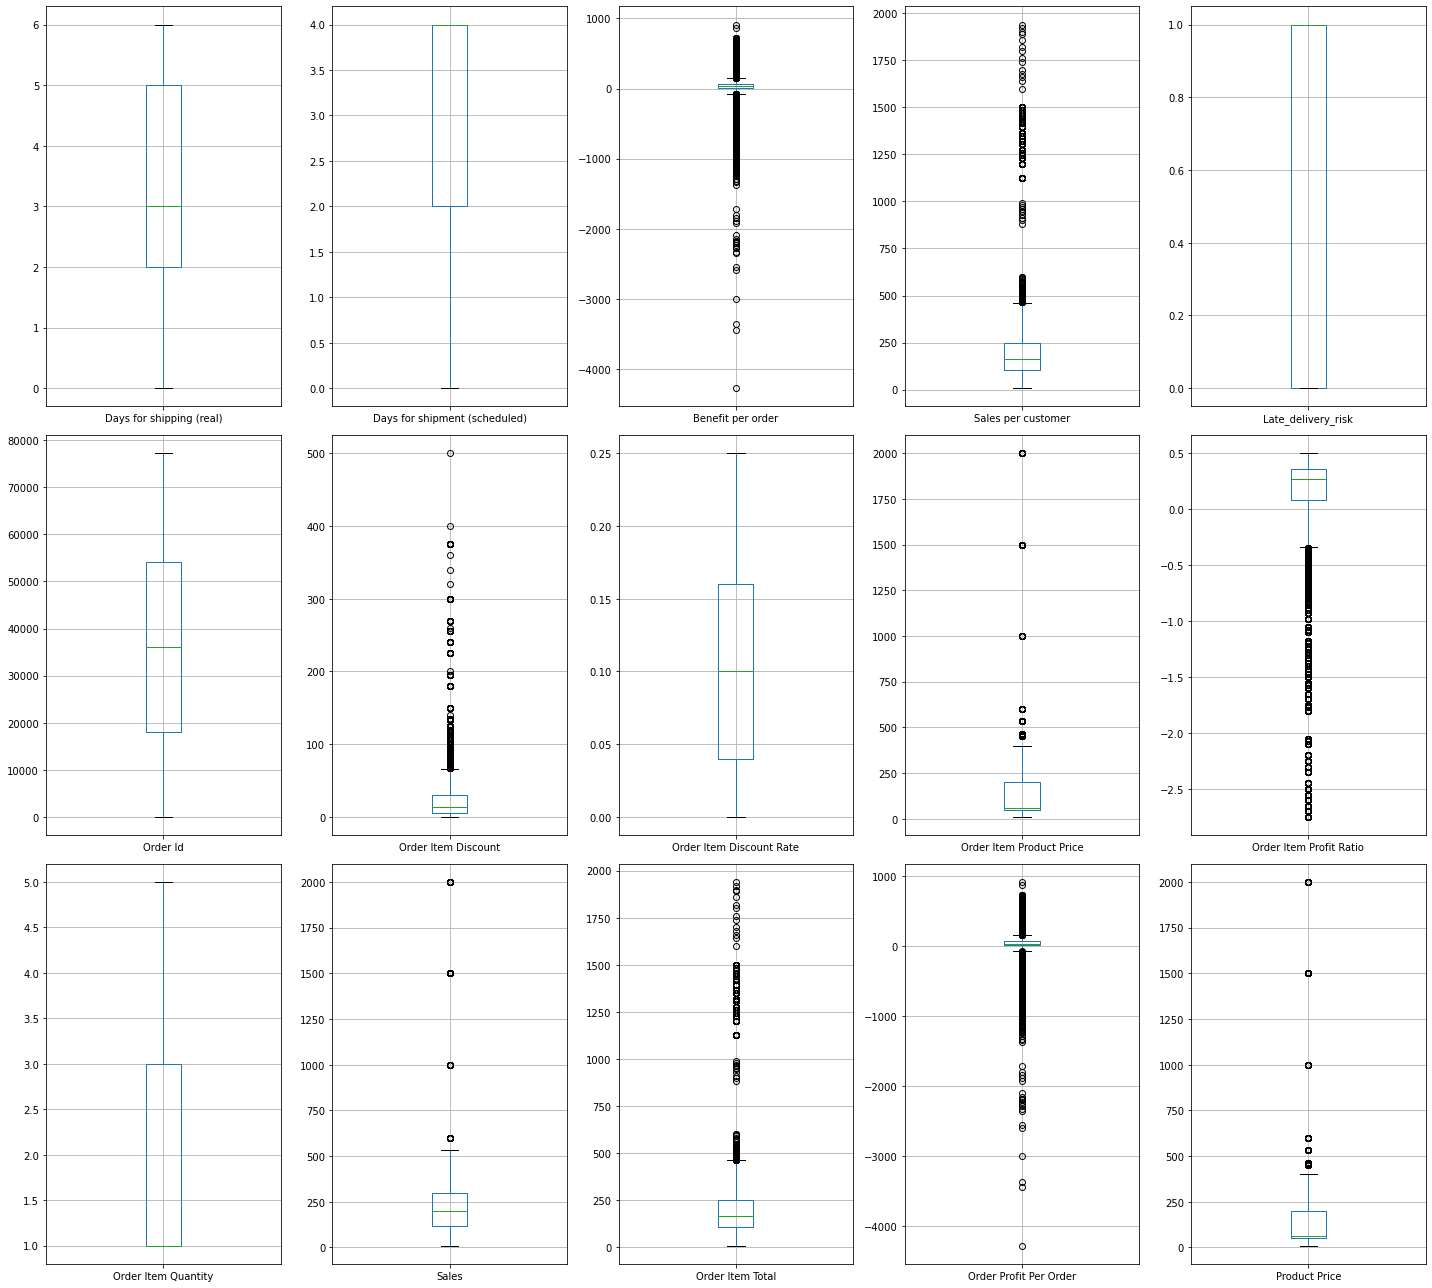

In [13]:
fig, axes = plt.subplots(3,5,figsize=(20,18))
for i,e in enumerate(df_num.columns.values):
    a = df_num.boxplot(e, ax=axes.flatten()[i])
plt.tight_layout() 
plt.show()

In [14]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) | (data> (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(150485, 25)

In [15]:
df_num= data.select_dtypes(exclude='object')
df_cat= data.select_dtypes(include='object')

### Correlation 

<AxesSubplot:>

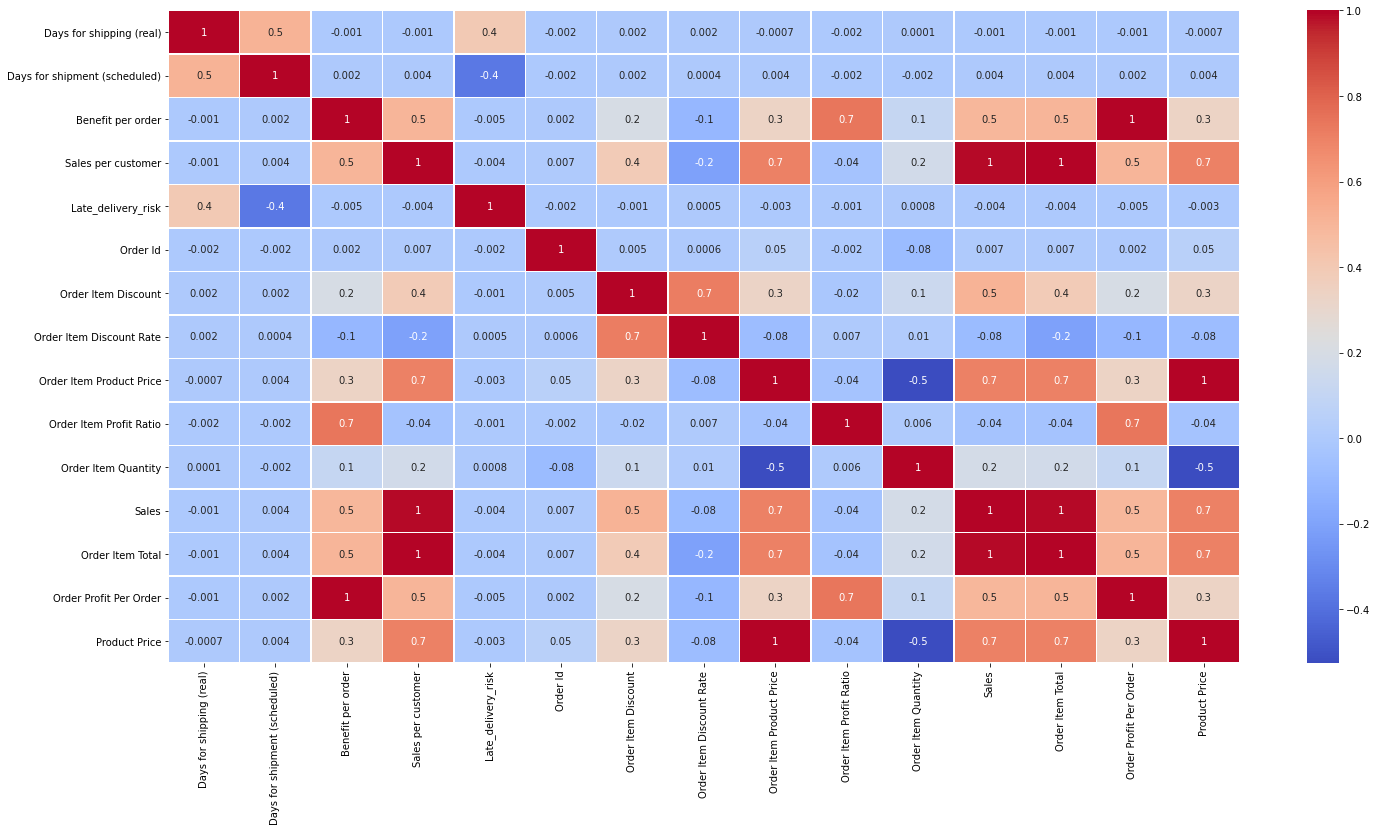

In [16]:
fig, ax = plt.subplots(figsize=(24,12))         # figsize
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm') # Heatmap for correlation matrix

### Skewness

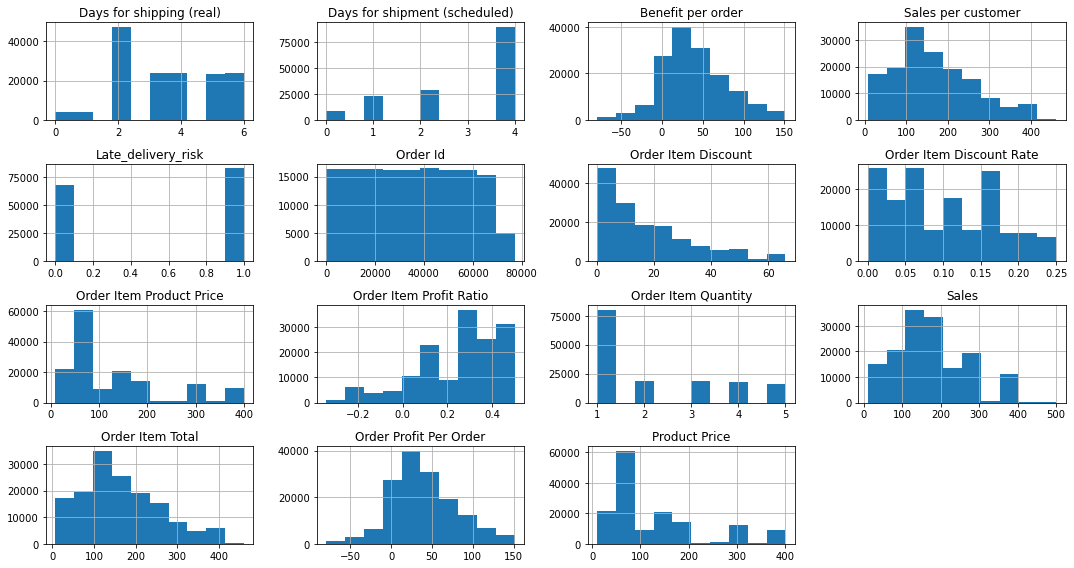

In [17]:
df_num.hist()
plt.tight_layout()
plt.show()

In [18]:
df_num.skew()

Days for shipping (real)         0.085002
Days for shipment (scheduled)   -0.732620
Benefit per order                0.347339
Sales per customer               0.677557
Late_delivery_risk              -0.191659
Order Id                         0.039020
Order Item Discount              1.041536
Order Item Discount Rate         0.358845
Order Item Product Price         1.346256
Order Item Profit Ratio         -0.772814
Order Item Quantity              0.854792
Sales                            0.596768
Order Item Total                 0.677557
Order Profit Per Order           0.347339
Product Price                    1.346256
dtype: float64

In [19]:
#df_num['Benefit per order']=(df_num['Benefit per order'])**(1/3)
df_num['Sales per customer']=(df_num['Sales per customer'])**(1/3)
df_num['Order Item Product Price']=(df_num['Order Item Product Price']**2.005)
df_num['Order Item Total']=(df_num['Order Item Total'])**(1/3)
#df_num['Order Profit Per Order']=(df_num['Order Profit Per Order'])**(1/3)
df_num['Order Item Profit Ratio']=(df_num['Order Item Profit Ratio']**2.005)
df_num['Order Item Discount']=(df_num['Order Item Discount'])**(1/3)
#df_num['Order Item Profit Ratio']=(df_num['Order Item Profit Ratio']**2.005)
df_num['Product Price']=(np.log(df_num['Product Price']))
df_num['Order Item Product Price']=(np.log(df_num['Order Item Product Price']))

In [20]:
df_num.skew()

Days for shipping (real)         0.085002
Days for shipment (scheduled)   -0.732620
Benefit per order                0.347339
Sales per customer              -0.220649
Late_delivery_risk              -0.191659
Order Id                         0.039020
Order Item Discount             -0.533811
Order Item Discount Rate         0.358845
Order Item Product Price         0.307577
Order Item Profit Ratio          0.409903
Order Item Quantity              0.854792
Sales                            0.596768
Order Item Total                -0.220649
Order Profit Per Order           0.347339
Product Price                    0.307577
dtype: float64

In [21]:
df_num.isnull().sum()

Days for shipping (real)             0
Days for shipment (scheduled)        0
Benefit per order                    0
Sales per customer                   0
Late_delivery_risk                   0
Order Id                             0
Order Item Discount                  0
Order Item Discount Rate             0
Order Item Product Price             0
Order Item Profit Ratio          15121
Order Item Quantity                  0
Sales                                0
Order Item Total                     0
Order Profit Per Order               0
Product Price                        0
dtype: int64

In [22]:
df_num['Order Item Profit Ratio'].fillna(df_num['Order Item Profit Ratio'].mean(),inplace=True)

In [23]:
df_num.isnull().sum()

Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Late_delivery_risk               0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Product Price                    0
dtype: int64

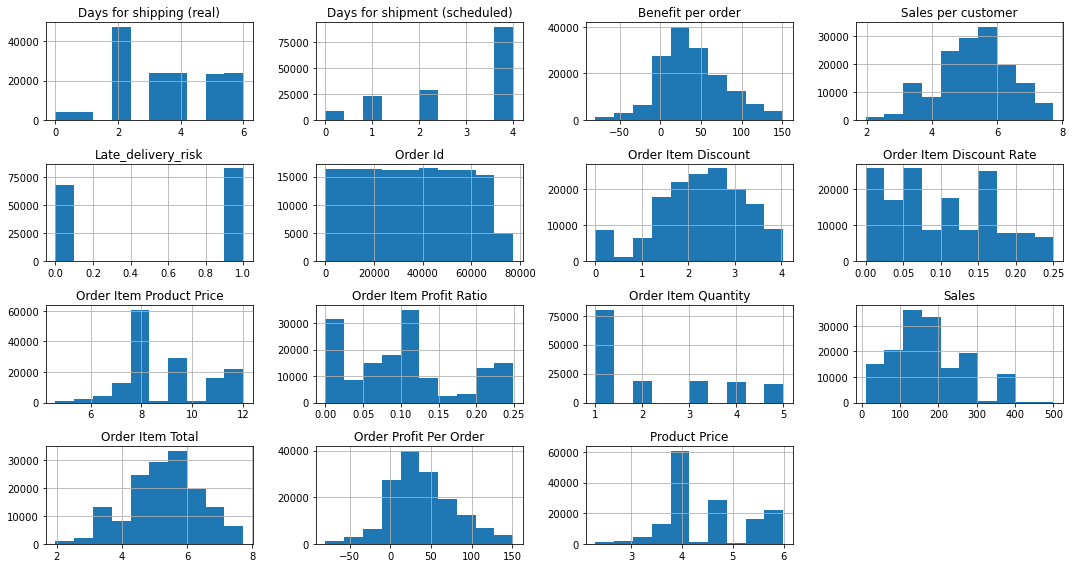

In [24]:
df_num.hist()
plt.tight_layout()
plt.show()

### Correlation after skewness

<AxesSubplot:>

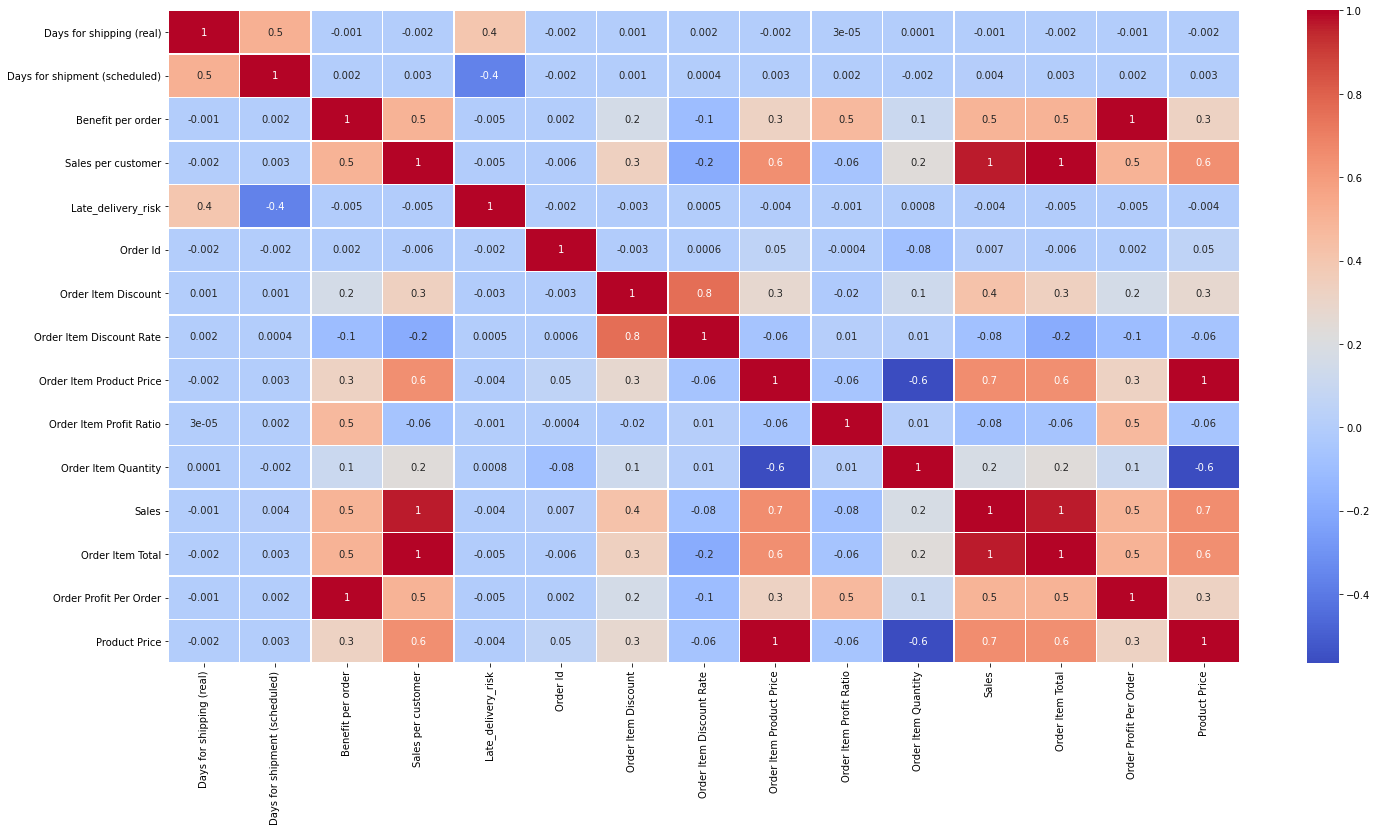

In [25]:
fig, ax = plt.subplots(figsize=(24,12))         # figsize
sns.heatmap(df_num.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm') # Heatmap for correlation matrix

## Data Visualization

<AxesSubplot:title={'center':'Total sales for all regions'}, xlabel='Order Region'>

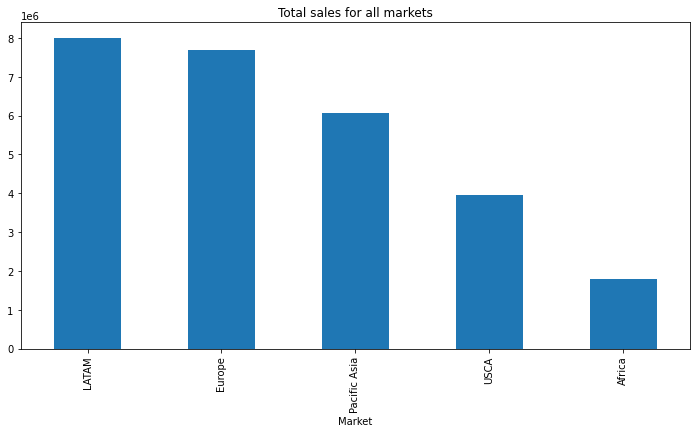

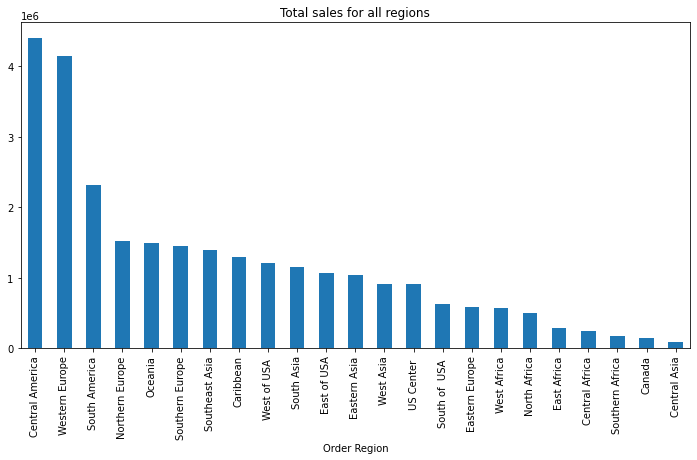

In [26]:
market = data.groupby('Market') #Grouping by market
region = data.groupby('Order Region')
plt.figure(1)
market['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

In [27]:
df_geo=data.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales').sort_values(by= 'Sales', ascending= False)
fig = px.choropleth(df_geo ,  locationmode='country names', locations='Order Country',
                    color='Sales', # lifeExp is a column of data
                    hover_name='Order Country', 
                    #hovear_data ='Order City',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

It could be seen from the graph that European market has the most number of sales whereas Africa has the least.In these markets western europe regions and central america recorded highest sales. 

Which catergory of products has highest sales?The same method can be followed here to see the product category with highest sales

<AxesSubplot:title={'center':'Average price'}, xlabel='Category Name'>

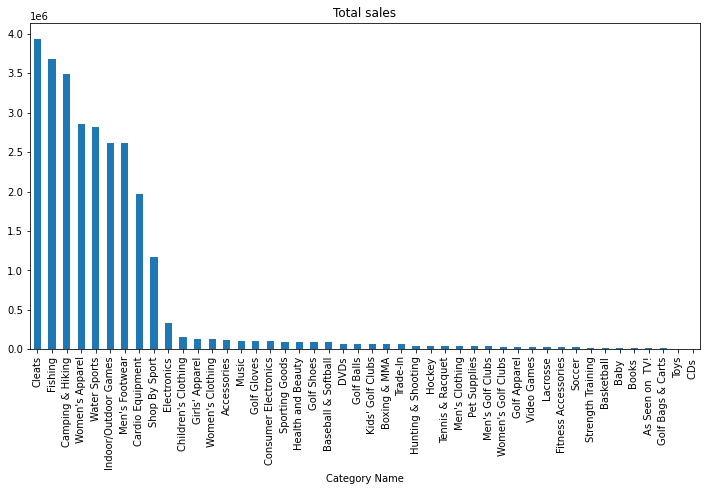

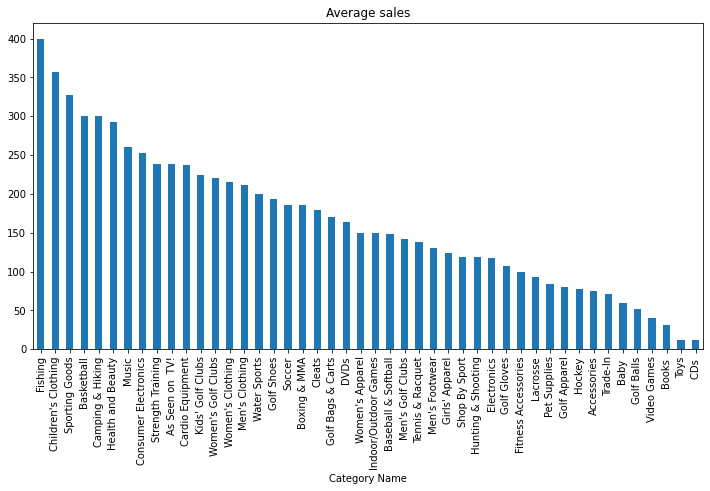

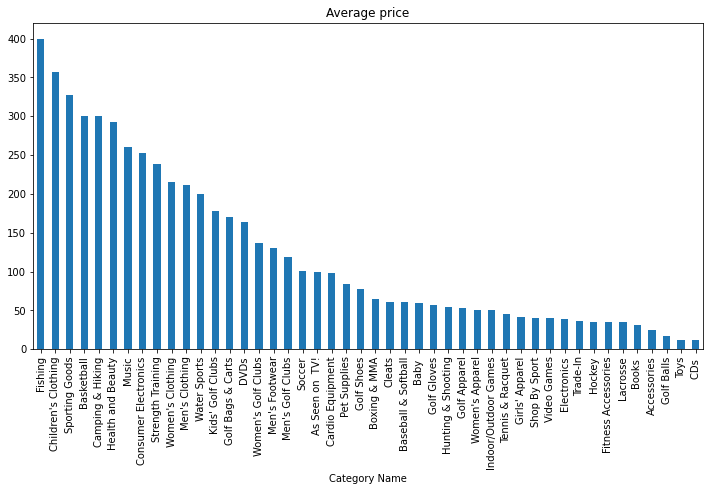

In [28]:
#Grouping all categories
cat = data.groupby('Category Name')
plt.figure(1)
# Total sum of sales for all categories
cat['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")
# Mean sales for all categories
plt.figure(2)
cat['Sales'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(3)
# Mean prices for all categories
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")

As we can see from fig 1 that the fishing category had most number of sales followed by the Cleats.However it is suprising to see that top 7 products with highest price on average are the most sold products on average with computers having almost 1350 sales despite price being 1500$. Since correlation was high between Price and Sales it will be intresting to see how price is impacting the sales for all the products to see the trend.

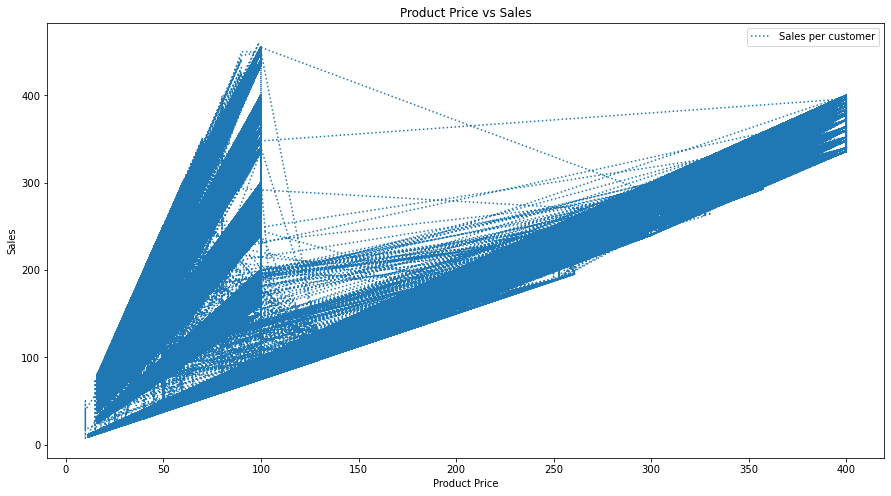

In [29]:
data.plot(x='Product Price', y='Sales per customer',linestyle='dotted',
     markerfacecolor='blue', markersize=12) 
plt.title('Product Price vs Sales')#title
plt.xlabel('Product Price')  # X-axis title
plt.ylabel('Sales') # Y=axis title
plt.show()

It can be observed that prices has linear relation with sales. 

In [30]:
data['order_year']= pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_week_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

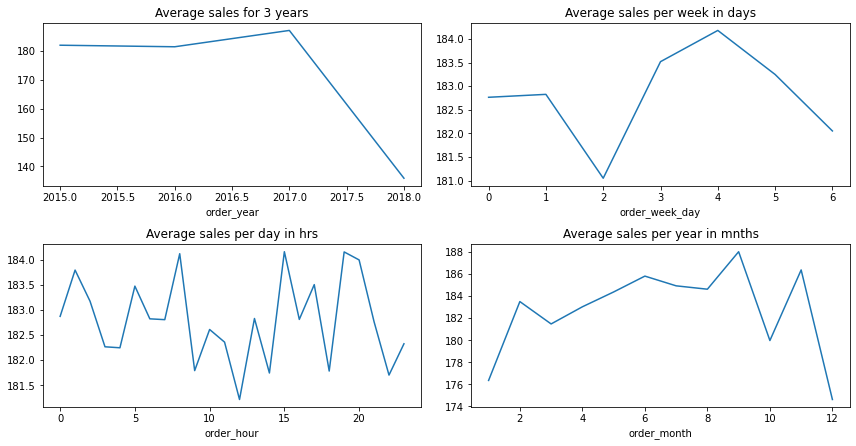

In [31]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater= data.groupby('order_year')
quater['Sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=data.groupby("order_week_day")
days['Sales'].mean().plot(figsize=(12,12),title='Average sales per week in days')
plt.subplot(4, 2, 3)
hrs=data.groupby("order_hour")
hrs['Sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')
plt.subplot(4, 2, 4)
mnth=data.groupby("order_month")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')
plt.tight_layout()
plt.show()

How price is impacting sales, when and which products are having more sales are found.The most number of orders came in October followed by November, and orders for all other months are consistent.Highest number of orders are placed by customers in 2017. 
Saturday recorded highest number of average sales and wednesday with the least number of sales. The average sales are consistent throughout the day irrespective of time with std of 3.

It is also important to know what type of payment method is being preferred by people to buy all these products in all regions? It can be found using .unique() method to see different payment methods.

In [32]:
data['Type'].unique()

array(['DEBIT', 'PAYMENT', 'TRANSFER', 'CASH'], dtype=object)

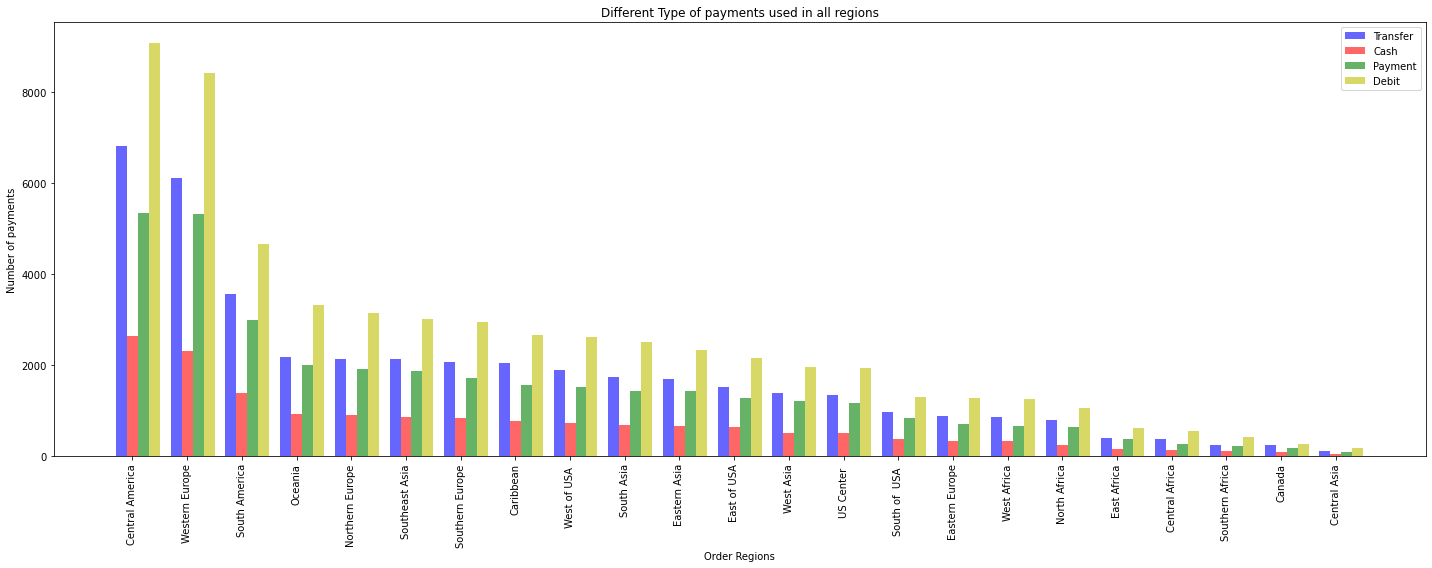

In [33]:
xyz1 = data[(data['Type'] == 'TRANSFER')]
xyz2= data[(data['Type'] == 'CASH')]
xyz3= data[(data['Type'] == 'PAYMENT')]
xyz4= data[(data['Type'] == 'DEBIT')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()


Total revenue lost with orders -358072.03016101697


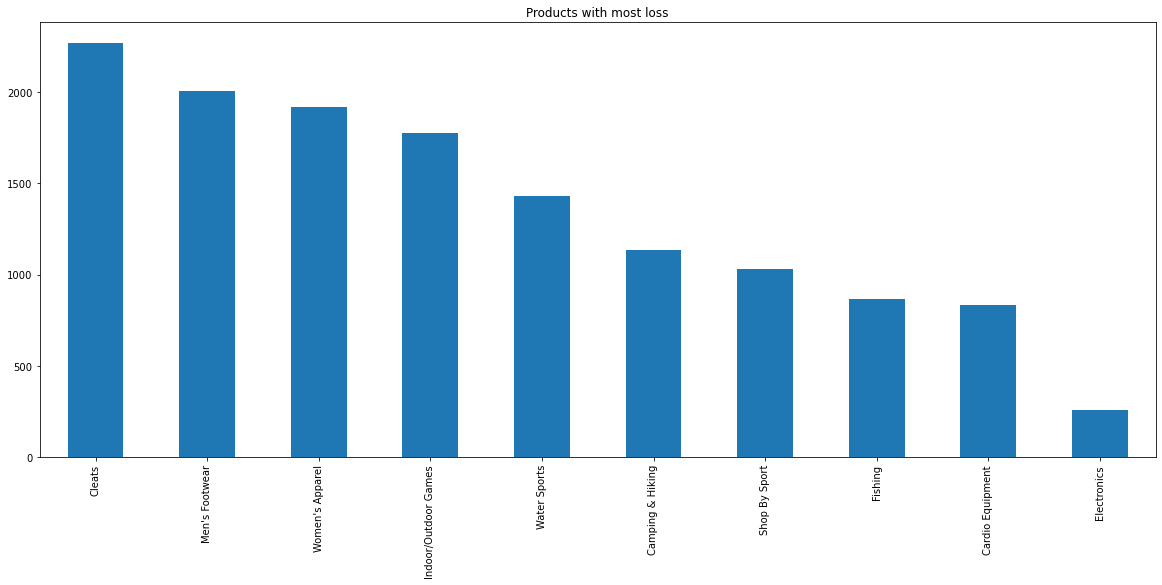

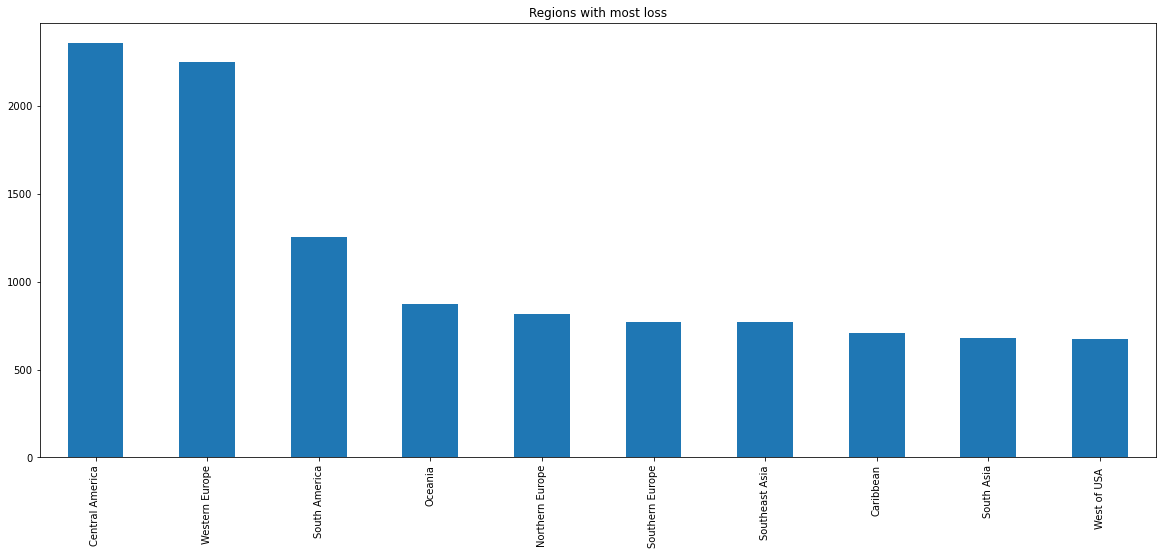

In [34]:
loss = data[(data['Benefit per order']<0)]
#Plotting top 10 products with most loss
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most loss")
plt.figure(2)
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most loss")
#Sum of total sales which are lost
print('Total revenue lost with orders',loss['Benefit per order'].sum())

The total loss sales are approximately 3.9 Millions which is an huge amount.It can be seen that Cleats is the category with most loss sales followed by Mens footwear.Most lost sales are happeing in central america and western europe region.This lost sales may have happened due to suspected frauds or late deliveries.

Finding which payment method is used to conduct frauds can be useful to  prevent fraud from happening in future

In [35]:
#Checking type of payment used to conduct fraud other than Transfer
xyz = data[(data['Type'] != 'TRANSFER')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
xyz['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

It can be clearly seen that there are no frauds conducted with DEBIT,CASH,PAYMENT methods so all the suspected fraud orders are made using wire transfer probably from abroad. Which region and what product is being suspected to the fraud the most? 

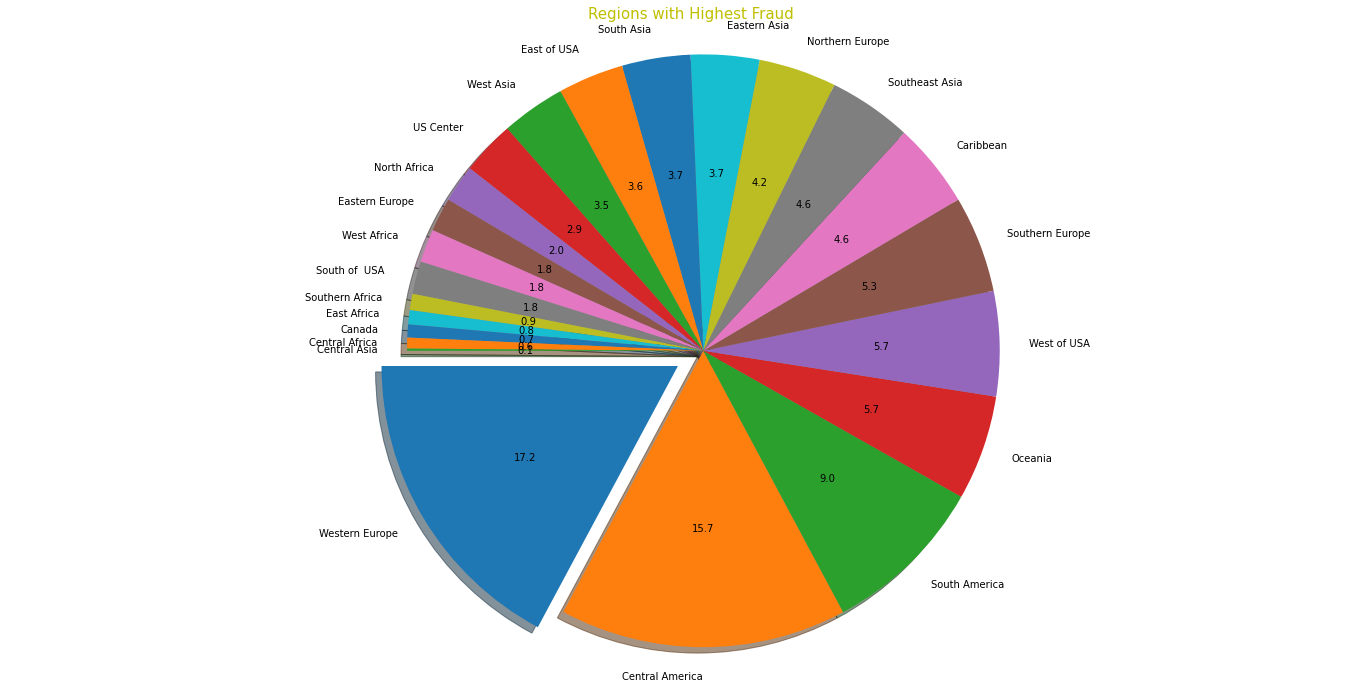

In [36]:
high_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=high_fraud['Order Region'].value_counts().plot.pie(figsize=(24,12),
                                                  startangle=180, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True,)
plt.title("Regions with Highest Fraud",size=15,color='y') # Plotting title
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

It can be observed that highest number of suspected fraud orders are from Western Europe which is approximately 17.4% of total orders followed by Central America with 15.5%. Which product is being suspected fraud the most?

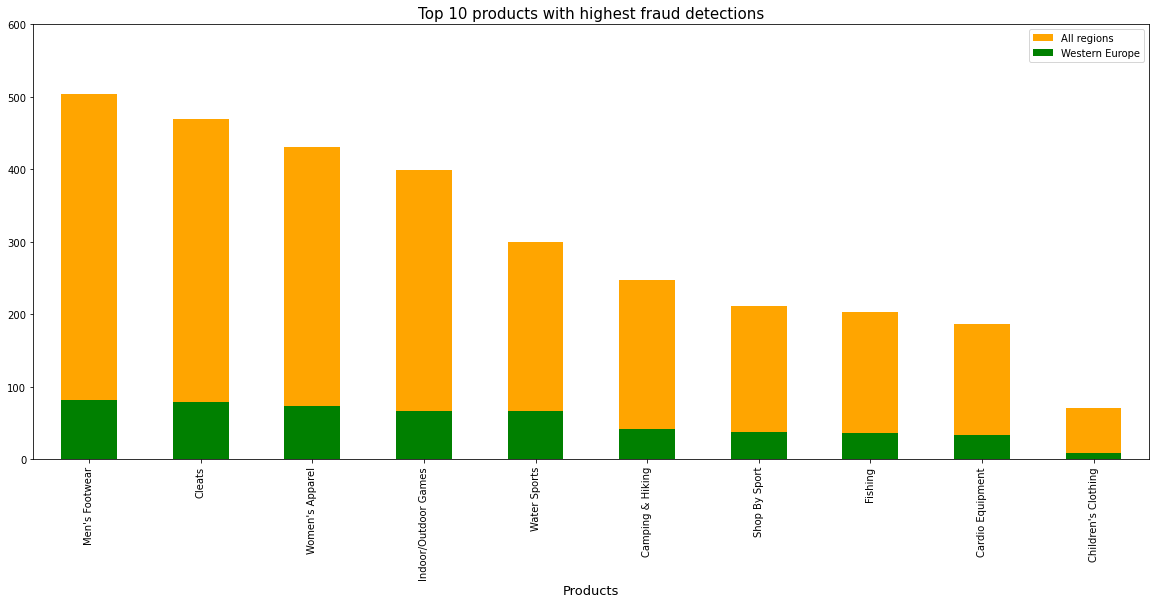

In [37]:
high_fraud1 = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] # 
high_fraud2 = data[(data['Order Status'] == 'SUSPECTED_FRAUD') &(data['Order Region'] == 'Western Europe')]
#Plotting bar chart for top 10 most suspected fraud department in all regions
fraud1=high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='orange')
#Plotting bar chart for top 10 most suspected fraud department in Western Europe
fraud2=high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='green')
plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()

It is very suprising to see that cleats department is being suspected to fraud the most followed by Men's footwear in all the regions and also in Western Europe.Which customers are conducting all these fraud?

<AxesSubplot:xlabel='Order Region'>

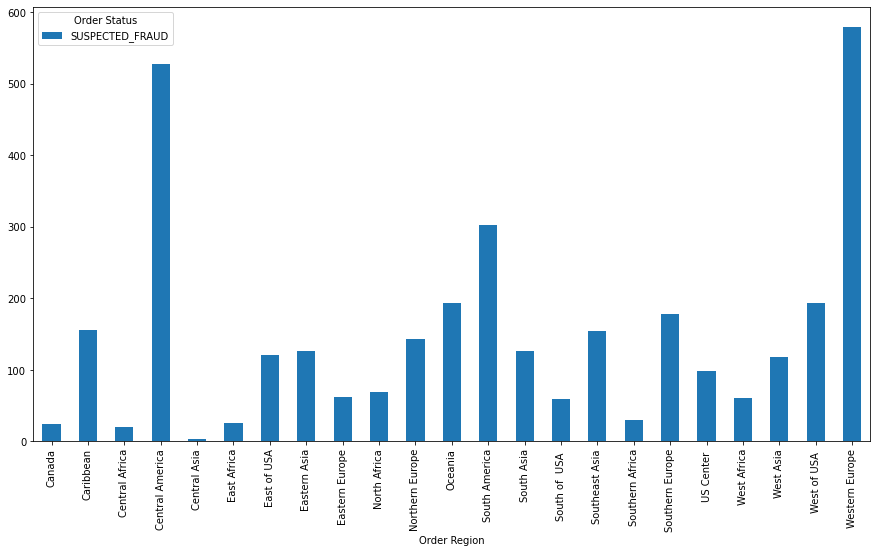

In [38]:
df=data[(data['Order Status']=='SUSPECTED_FRAUD')]
df1=df[['Order Region','Order Status']]
pd.crosstab(df1['Order Region'],df1['Order Status']).plot(kind='bar')

<AxesSubplot:title={'center':'Top 10 products with most late deliveries'}>

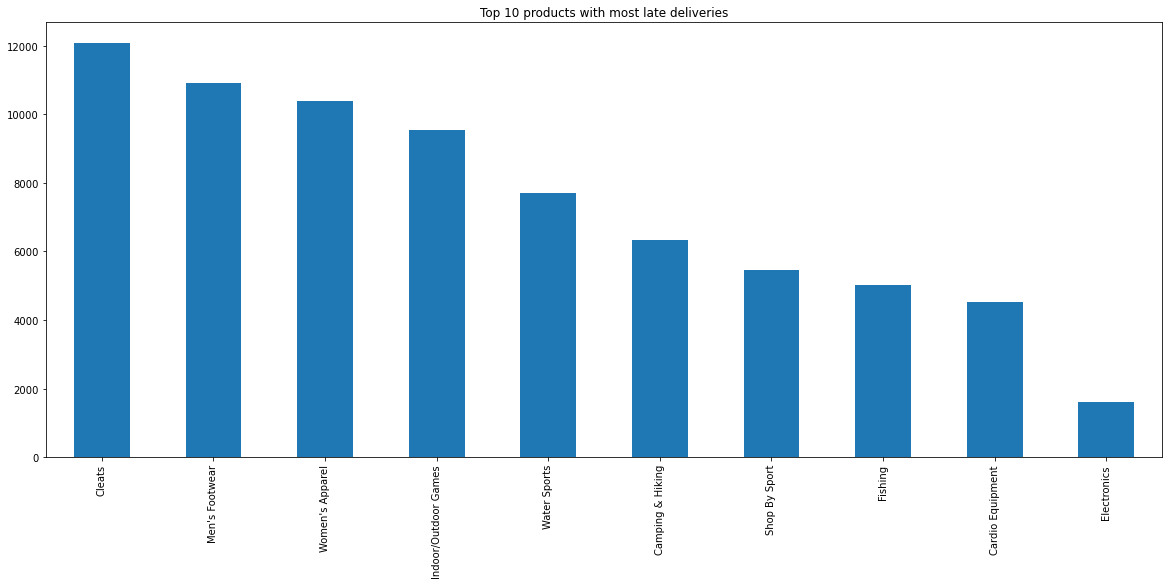

In [39]:
#Filtering columns with late delivery status
late_delivery1 = data[(data['Delivery Status'] == 'Late delivery')]
#Top 10 products with most late deliveries
late_delivery1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")


It can be seen that orders with Cleats department is getting delayed the most followed by Men's Footwear.For some orders risk of late delivery is given in data.The products with late delivery risk are compared with late delivered products. 

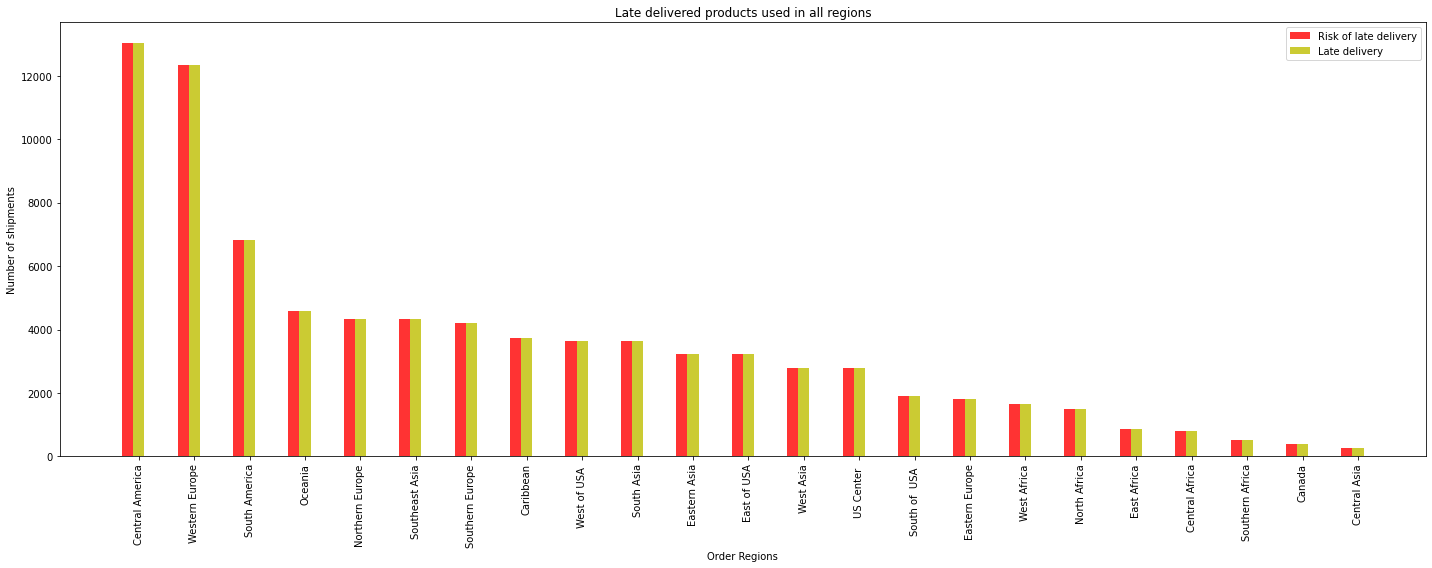

In [40]:
#Filtering orders with late delivery risk
xyz1 = data[(data['Late_delivery_risk'] == 1)]
#Filtering late delivered orders
xyz2 = data[(data['Delivery Status'] == 'Late delivery')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
#Index names
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8)) #Figure size
index=np.arange(n_groups)
bar_width=0.2
opacity=0.8
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='r',label='Risk of late delivery')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='y',label='Late delivery')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Late delivered products used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()


Thus,it can be concluded that for all the products with late delivery risk irrespective of region the product is actually being delivered late,to avoid late delivery the company can ship products faster using better shipping method or schedule more time of Days for shipment so customers will know in advance when the products will reach them. It will be interesting to see the number of late deliveried orders for different types of shipment method in all regions.

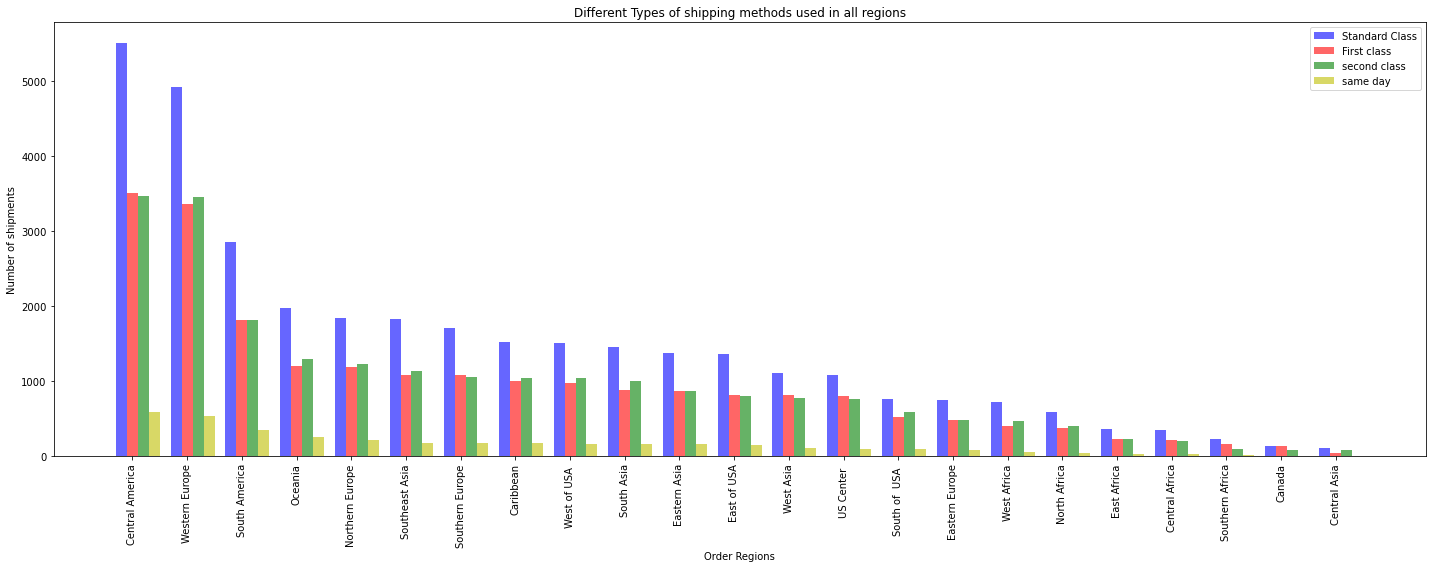

In [41]:
#Filtering late delivery orders with standard class shipping
xyz1 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Standard Class')]
#Filtering late delivery orders with first class shipping
xyz2 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'First Class')]
#Filtering late delivery orders with second class shipping
xyz3 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Second Class')]
#Filtering late delivery orders with same day shipping
xyz4 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Same Day')]
#Counting total values
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
#Index names
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Standard Class')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='First class')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='second class')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='same day')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Different Types of shipping methods used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

As expected the most number of late deliveries  for all regions occured with standard class shipping,with same day shipping being the one with least number of late deliveries.Both the first class and second class shipping have almost equal number of late deliveries.

## Data Preparation for model

In [42]:
train_data=data.copy()

Two new columns are created for orders with suspected fraud and late delivery making them into binary classification, which in turn helps to measure performance of different models better.

In [43]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)

Now to measure machine models accurately all the columns with repeated values are dropped like late_delivery_risk column because, it is known all the products with late delivery risk are delivered late. And Order Status column because, a new column for fraud detection is created there is a chance machine learning model might take values directly from these columns to predict output.

In [44]:
#Dropping columns with repeated values
train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order_month_year','order date (DateOrders)'], axis=1, inplace=True)

It is important to check the type of variables in the data because machine learning models can only be trained with numerical values.

In [45]:
train_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Name                     object
Customer Segment                  object
Market                            object
Order Country                     object
Order Id                           int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Product Price         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Sales                            float64
Order Item Total                 float64
Order Profit Per Order           float64
Order Region                      object
Product Price                    float64
Shipping Mode                     object
order_year                         int64
order_month                        int64
order_week_day                     int64
order_hour      

There are some columns with object type data which cannot be trained in machine learning models so all the object type data is converted to int type using preprocessing label encoder library.

In [46]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
#train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
#train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
#train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
#train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
#train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
#train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
#train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
#train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])

#display the initial records
train_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Name,Customer Segment,Market,Order Country,Order Id,...,Order Profit Per Order,Order Region,Product Price,Shipping Mode,order_year,order_month,order_week_day,order_hour,fraud,late_delivery
0,1,3,4,91.250000,314.640015,36,0,3,70,77202,...,91.250000,15,327.75,3,2018,1,2,22,0,0
3,1,3,4,22.860001,304.809998,36,2,3,8,75937,...,22.860001,11,327.75,3,2018,1,5,11,0,0
4,2,2,4,134.210007,298.250000,36,1,3,8,75936,...,134.210007,11,327.75,3,2018,1,5,11,0,0
5,3,6,4,18.580000,294.980011,36,0,3,8,75935,...,18.580000,11,327.75,3,2018,1,5,11,0,0
6,1,2,1,95.180000,288.420013,36,2,3,31,75934,...,95.180000,7,327.75,0,2018,1,5,10,0,1


Now all the data is transformed into int type. The dataset is split into train data and test data so model can be trained with train data and the performance of model can be evaluated using test data.

## Classification Model

In [47]:
#All columns expect fraud
xf=train_data.loc[:, train_data.columns != 'fraud']
#Only fraud column
yf=train_data['fraud']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xf_train, xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size = 0.2,random_state = 42)
#All columns expect fraud
xl=train_data.loc[:, train_data.columns != 'late_delivery']
#Only fraud column
yl=train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xl_train, xl_test,yl_train,yl_test = train_test_split(xl,yl,test_size = 0.2, random_state = 42)

Since there are so many different variables with different ranges standard scaler is used to standardize total the data so it is internally consistent before training the data with machine learning.

In [48]:
sc = StandardScaler()
xf_train=sc.fit_transform(xf_train)
xf_test=sc.transform(xf_test)
xl_train=sc.fit_transform(xl_train)
xl_test=sc.transform(xl_test)

The data is now ready to be used in machine learning models since many different models are compared training every model from begining is complicated so a function is defined to make the process bit easy. The output is in binary classification format so all the models are measured with Accuracy score,recall score and F1 score metrics. 

To measure the performance of different models F1 score is used as the main metric because it is the harmonic mean of precison score and recall score.And all the scores are multiplied with 100 for better understanding

In [49]:
def classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test):
    model_f=model_f.fit(xf_train,yf_train) # Fitting train data for fraud detection
    model_l=model_l.fit(xl_train,yl_train) # Fitting train data for predection of late delivery
    yf_pred=model_f.predict(xf_test)
    yl_pred=model_l.predict(xl_test)  
    accuracy_f=accuracy_score(yf_pred, yf_test) #Accuracy for fraud detection
    accuracy_l=accuracy_score(yl_pred, yl_test) #Accuracy for predection of late delivery
    recall_f=recall_score(yf_pred, yf_test) #Recall score for  fraud detection
    recall_l=recall_score(yl_pred, yl_test)# Recall score for predection of late delivery
    conf_f=confusion_matrix(yf_test, yf_pred)# fraud detection
    conf_l=confusion_matrix(yl_test, yl_pred)#predection of late delivery
    f1_f=f1_score(yf_test, yf_pred)#fraud detection
    f1_l=f1_score(yl_test, yl_pred)#predection of late delivery
    print('Model paramters used are :',model_f)
    print('Accuracy of fraud status is        :', (accuracy_f)*100,'%')
    print('Recall score of fraud status is        :', (recall_f)*100,'%')
    print('Conf Matrix of fraud status is        :\n',  (conf_f))
    print('F1 score of fraud status is        :', (f1_f)*100,'%')
    print('Accuracy of late delivery status is:', (accuracy_l)*100,'%')
    print('Recall score of late delivery status is:', (recall_l)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_l))
    print('F1 score of late delivery status is:', (f1_l)*100,'%')

### Logistic Classification Model

In [50]:
model_f = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
model_l = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
#Giving inputs to the defined function
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : LogisticRegression(random_state=0)
Accuracy of fraud status is        : 97.82038076884739 %
Recall score of fraud status is        : 50.78125 %
Conf Matrix of fraud status is        :
 [[29311   126]
 [  530   130]]
F1 score of fraud status is        : 28.38427947598253 %
Accuracy of late delivery status is: 98.75402864072831 %
Recall score of late delivery status is: 97.77856762040163 %
Conf Matrix of late delivery status is: 
 [[13216   375]
 [    0 16506]]
F1 score of late delivery status is: 98.87680833857489 %


### K nearest Neighbors classification

In [51]:
model_f = KNeighborsClassifier(n_neighbors=1)
model_l = KNeighborsClassifier(n_neighbors=1)
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : KNeighborsClassifier(n_neighbors=1)
Accuracy of fraud status is        : 97.20570156494003 %
Recall score of fraud status is        : 33.39449541284404 %
Conf Matrix of fraud status is        :
 [[29074   363]
 [  478   182]]
F1 score of fraud status is        : 30.207468879668053 %
Accuracy of late delivery status is: 85.79260391401137 %
Recall score of late delivery status is: 87.21850273889227 %
Conf Matrix of late delivery status is: 
 [[11491  2100]
 [ 2176 14330]]
F1 score of late delivery status is: 87.01724556716056 %


### Random forest classification

In [52]:
model_f = RandomForestClassifier()
model_l = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : RandomForestClassifier()
Accuracy of fraud status is        : 98.32209190284746 %
Recall score of fraud status is        : 80.1556420233463 %
Conf Matrix of fraud status is        :
 [[29386    51]
 [  454   206]]
F1 score of fraud status is        : 44.92911668484187 %
Accuracy of late delivery status is: 98.75402864072831 %
Recall score of late delivery status is: 97.77856762040163 %
Conf Matrix of late delivery status is: 
 [[13216   375]
 [    0 16506]]
F1 score of late delivery status is: 98.87680833857489 %


### eXtreme Gradient Boosting Classification

In [53]:
model_f = xgb.XGBClassifier()
model_l = xgb.XGBClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

[17:46:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model paramters used are : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
 

### Decision tree classification

In [54]:
model_f = tree.DecisionTreeClassifier()
model_l = tree.DecisionTreeClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : DecisionTreeClassifier()
Accuracy of fraud status is        : 97.93999401933748 %
Recall score of fraud status is        : 52.762430939226526 %
Conf Matrix of fraud status is        :
 [[29095   342]
 [  278   382]]
F1 score of fraud status is        : 55.20231213872832 %
Accuracy of late delivery status is: 98.44170515333755 %
Recall score of late delivery status is: 98.78323295005171 %
Conf Matrix of late delivery status is: 
 [[13391   200]
 [  269 16237]]
F1 score of late delivery status is: 98.57632881036943 %


In [55]:
classification_data = {'Classification Model':  ['Logistic','K nearest Neighbour','Random Forest','eExtreme gradient boosting','Decision tree'],
        'Accuracy Score for Fraud Detection':     [97.80,97.36,98.48,98.93,99.12],
        'Recall Score for Fraud Detection':       [59.40,41.90,93.18,89.89,82.53],
        'F1 Score for Fraud Detection':           [31.22,35.67,54.57,73.22,81.00],
        'Accuracy Score for Late Delivery':       [98.84,80.82,98.60,99.24,99.37],
        'Recall Score for Late Delivery':         [97.94,83.45,97.52,98.65,99.44],
        'F1 Score for Late Delivery':             [98.96,82.26,98.74,99.31,99.42] }
#Creating data frame with Column Names
classification_comparision = pd.DataFrame (classification_data, columns = ['Classification Model','Accuracy Score for Fraud Detection','Recall Score for Fraud Detection','F1 Score for Fraud Detection',
                                                                           'Accuracy Score for Late Delivery','Recall Score for Late Delivery','F1 Score for Late Delivery'])


In [56]:
classification_comparision

,Classification Model,Accuracy Score for Fraud Detection,Recall Score for Fraud Detection,F1 Score for Fraud Detection,Accuracy Score for Late Delivery,Recall Score for Late Delivery,F1 Score for Late Delivery
0,Logistic,97.80,59.40,31.22,98.84,97.94,98.96
1,K nearest Neighbour,97.36,41.90,35.67,80.82,83.45,82.26
2,Random Forest,98.48,93.18,54.57,98.60,97.52,98.74
3,eExtreme gradient boosting,98.93,89.89,73.22,99.24,98.65,99.31
4,Decision tree,99.12,82.53,81.00,99.37,99.44,99.42


## Regression Model

In [57]:
xs=train_data.loc[:, train_data.columns != 'Sales']
ys=train_data['Sales']
xs_train, xs_test,ys_train,ys_test = train_test_split(xs,ys,test_size = 0.3, random_state = 42)

MinMax scaler is used to standardize data since data type is regression.

In [58]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE','MAE'])
scaler=MinMaxScaler()
xs_train=scaler.fit_transform(xs_train)
xs_test=scaler.transform(xs_test)

The data is now ready to be used in machine learning models.Since, different models are compared here like above a function is defined. The output is regression type so accuracy cannot be used as a measure to compare different models like classification models, so all the models are compared using mean absolute error (MAE) and RMSE.

The lower the value of mean absolute error the better the model is performing and lower values of RMSE indicate better fit.

In [59]:
def regressionmodel(model_s,xs_train, xs_test,ys_train,ys_test):
    model_s=model_s.fit(xs_train,ys_train)#Fitting train data for sales
    ys_pred=model_s.predict(xs_test)#predicting sales with test data
    print('Model parameter used are:',model_s) #Printing the model to see which parameters are used
     #Printing mean absolute error for predicting sales
    print("MAE of sales is         :", metrics.mean_absolute_error(ys_test,ys_pred))
     #Printing Root mean squared error for predicting sales
    print("RMSE of sales is        :",np.sqrt(metrics.mean_squared_error(ys_test,ys_pred)))
    print("R-Squared               :", metrics.r2_score(ys_test, ys_pred)),
    print('Adj. R-Squared          :', metrics.adjusted_rand_score(ys_test, ys_pred))
    # compile the required information
#     model_metric = pd.Series({
#                      'Model_Name': model_s,
#                      'R-Squared': metrics.r2_score(ys_test, ys_pred),
#                      'Adj. R-Squared': metrics.adjusted_rand_score(ys_test, ys_pred),
#                     'RMSE':np.sqrt(metrics.mean_squared_error(ys_test,ys_pred)),
#                     "MAE of sales is": metrics.mean_absolute_error(ys_test,ys_pred)
#                    })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
#     score_card = score_card.append(model_metric, ignore_index=True)


    
# # print the score card
#     print(score_card)

### Linear Regression

In [60]:
model_s=LinearRegression()
regressionmodel(model_s,xs_train, xs_test,ys_train,ys_test)

Model parameter used are: LinearRegression()
MAE of sales is         : 0.0003799819167525685
RMSE of sales is        : 0.0012690450023552836
R-Squared               : 0.9999999998357919
Adj. R-Squared          : 0.0


### Lasso Regression

In [61]:
model_s = linear_model.Lasso(alpha=0.1)
regressionmodel(model_s,xs_train, xs_test,ys_train,ys_test)

Model parameter used are: Lasso(alpha=0.1)
MAE of sales is         : 0.4508092380036567
RMSE of sales is        : 0.5538939455835086
R-Squared               : 0.999968718060115
Adj. R-Squared          : 0.10332840245385955


### Ridge Regression

In [62]:
model_s = Ridge(alpha=1.0)
regressionmodel(model_s,xs_train, xs_test,ys_train,ys_test)

Model parameter used are: Ridge()
MAE of sales is         : 0.023327806526386434
RMSE of sales is        : 0.040038956906943785
R-Squared               : 0.9999998365420867
Adj. R-Squared          : 0.0


### Random Forest Regression

In [63]:
model_s = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
regressionmodel(model_s,xs_train, xs_test,ys_train,ys_test)

Model parameter used are: RandomForestRegressor(max_depth=10, random_state=40)
MAE of sales is         : 0.21414593225948092
RMSE of sales is        : 1.2875373444819003
R-Squared               : 0.9998309714329049
Adj. R-Squared          : 0.618344185970725


### eXtreme Gradient Boosting Regression

In [64]:
model_s = xgb.XGBRegressor()
regressionmodel(model_s,xs_train, xs_test,ys_train,ys_test)

Model parameter used are: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
MAE of sales is         : 0.11524108099911129
RMSE of sales is        : 0.47849939847989353
R-Squared               : 0.9999766544971247
Adj. R-Squared          : 0.046574090445626826


### Decision Tree Regression

In [65]:
model_s = tree.DecisionTreeRegressor()
regressionmodel(model_s,xs_train, xs_test,ys_train,ys_test)

Model parameter used are: DecisionTreeRegressor()
MAE of sales is         : 0.009535062938621672
RMSE of sales is        : 0.4098799050226209
R-Squared               : 0.9999828701446843
Adj. R-Squared          : 0.7359448262598701


In [66]:
# #Giving column Values
# Regression_data = {'Regression Model':  ,
#         'MAE Value for Sales' :        [0.0005,1.55,0.75,0.19,0.154,0.013],
#         'RMSE Value for Sales':        [0.0014,2.33,0.97,1.79,3.13,0.918]}
# #Creating data frame with Column Names
# Regression_comparision = pd.DataFrame (Regression_data, columns = ['Regression Model','MAE Value for Sales','RMSE Value for Sales',])
# Regression_comparision

## Model Fine tuning

In [67]:
from sklearn.decomposition import PCA
 
pca = PCA()
 
X_train = pca.fit_transform(xs_train)
X_test = pca.transform(xs_test)
 
explained_variance = pca.explained_variance_ratio_

Text(0.5, 1.0, 'hp')

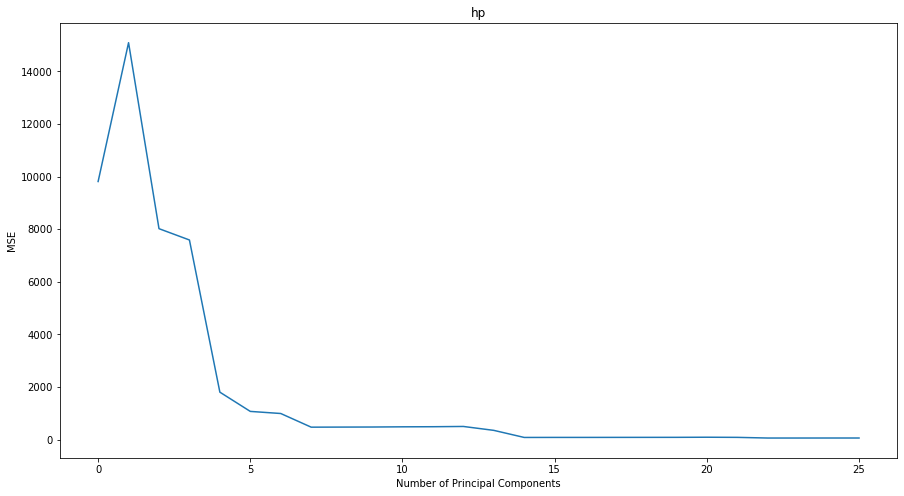

In [68]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = DecisionTreeRegressor()
mse = []

# Calculate MSE with only the intercept
score = -1*cross_val_score(regr,
           np.ones((len(X_train),1)), ys_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 26):
    score = -1*cross_val_score(regr,
               X_train[:,:i], ys_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [69]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)


array([15.39, 26.62, 35.91, 43.06, 49.58, 56.  , 62.17, 67.18, 72.17,
       77.09, 81.45, 85.5 , 89.28, 92.43, 95.21, 97.3 , 98.31, 98.89,
       99.32, 99.6 , 99.85, 99.99, 99.99, 99.99, 99.99, 99.99])

In [70]:
#split the dataset into training (70%) and testing (30%) sets
Xpcr_train,Xpcr_test,ypcr_train,ypcr_test = train_test_split(xs_train,ys_train,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(Xpcr_train)
X_reduced_test = pca.transform(Xpcr_test)[:,:14]

#train PCR model on training data 
regr = DecisionTreeRegressor()
regr.fit(X_reduced_train[:,:14], ypcr_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(ypcr_test, pred))


9.599758544151745

In [71]:
np.sqrt(metrics.mean_squared_error(ypcr_test, pred))

9.599758544151745

In [72]:
print("RMSE of sales is        :",np.sqrt(metrics.mean_squared_error(ypcr_test, pred)))
print("R-Squared               :", metrics.r2_score(ypcr_test, pred))
print('Adj. R-Squared          :', metrics.adjusted_rand_score(ypcr_test, pred))

RMSE of sales is        : 9.599758544151745
R-Squared               : 0.9906295501399492
Adj. R-Squared          : 0.5707016129119504


In [73]:
regr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [10,25,50, 75],
                  'max_depth'    : [4,6,8,10]
                 }
 
# initiate the ridge regression model
ridge = xgb.XGBRegressor()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_reduced_train[:,:14], ypcr_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print("RMSE of sales is        :",np.sqrt(metrics.mean_squared_error(ypcr_test, pred)))

In [ ]:
print("RMSE of sales is        :",np.sqrt(metrics.r2_score(ypcr_test, pred)))

In [ ]:
print('Adj. R-Squared          :', metrics.adjusted_rand_score(ypcr_test, pred))